### Tarea 10.
Editar las rutinas presentadas en esta clase para calcular la _derivada hacia adelante_ a orden más alto, pero en esta ocasión para el operador _derivada simetrizada_.
* No olvide hacer el test de la rutina, similar a lo que se hizo en este notebook para el $cos$.

In [ ]:
using SymPy # Se utilizara la libreria SymPy

In [ ]:
using Calculus #voy a utilizar la libreria calculus

In [ ]:
function coeff_Taylor_Log(i)
x=Sym("x"); #voy a declarar simbólicas las variables x y h
h=Sym("h");
N(subs(diff(log(x+1.0),x,i)/factorial(Float64(i)),x=>0))
end;

function coeff_Taylor_asinh_rational(i)
    x=Sym("x");
    h=Sym("h");
    subs(diff(asinh(x/2),x,i)/factorial(i),x=>0) 
end;

function finite_difference_forward(f) #Con eto podemos fredefinir mejor deriv simetrica
    return (x,h)->f(x+h,h)-f(x-h,h)
end;

In [6]:
function Derivative_order(f,x,h,order)
    g(x,h)=f(x)
    der=0
    for i in range(1,order)
        g=finite_difference_forward(g)
        der=der+coeff_Taylor_asinh(i)*g(x,h)
    end
    der/h
end;
function Derivative_order_rational_coefficients(f,x,h,order)
    g(x,h)=f(x)
    der=0
    for i in range(1,order)
        g=finite_difference_forward(g)
        der=der+coeff_Taylor_asinh_rational(i)*g(x,h)
    end
    der/h
end;

In [7]:
a=Derivative_order_rational_coefficients(SymFunction("f"),Sym("x"),Sym("h"),2)# Vamos a obtener la der simetrica

  f(-h + x)   f(h + x)
- --------- + --------
      2          2    
----------------------
          h           

In [8]:
series(a,Sym("h"),0,5) 

                             /   3           \|            /   5           \| 
                           2 |  d            ||          4 |  d            || 
                          h *|------(f(xi_1))||         h *|------(f(xi_1))|| 
                             |     3         ||            |     5         || 
/  d           \|            \dxi_1          /|xi_1=x      \dxi_1          /|x
|-----(f(xi_1))||       + --------------------------- + ----------------------
\dxi_1         /|xi_1=x                6                            120       

             
             
             
             
i_1=x    / 5\
----- + O\h /
             

In [9]:
ap=Derivative_order_rational_coefficients(SymFunction("f"),Sym("x"),Sym("h"),5) # aqui speramos ver una aproximacion a la solucion

  3*f(-5*h + x)   25*f(-3*h + x)   75*f(-h + x)   75*f(h + x)   25*f(3*h + x) 
- ------------- + -------------- - ------------ + ----------- - ------------- 
       1280            768             128            128            768      
------------------------------------------------------------------------------
                                             h                                

  3*f(5*h + x)
+ ------------
      1280    
--------------
              

In [10]:
series(ap,Sym("h"),0,6) #al parecer la derivada se aproxima más rápido a esta (la solucion)

/  d           \|          / 6\
|-----(f(xi_1))||       + O\h /
\dxi_1         /|xi_1=x        

In [12]:
a=Derivative_order_rational_coefficients(cos,1,0.5,2)# Vamos a obtener la der simetrica

-0.806845360222670

In [13]:
series(a,0.5,0,5) 

-0.806845360222670

In [14]:
ap=Derivative_order_rational_coefficients(cos,1,0.5,5)

-0.840951059021860

In [15]:
series(ap,0.5,0,6)

-0.840951059021860

In [24]:
function comparacionconhdada(conjunto,f,h) #es una funcion para comparar como tienden nuestras funciones a nuestro valor real con una h fija dada
    r=rand(conjunto) #r es un punto aleatorio del conjunto declarado como conjunto
    real=f'(r) #me va a dar el valor real de nuestra funcion en un punto r
    a=Derivative_order_rational_coefficients(f,r,h,2) #nos da nuestra aprox por derivada simetrica
    ap=Derivative_order_rational_coefficients(f,r,h,5) #nos da nuestra aprox de orden 5
    println(" la derivada real es ",real," la aprox por derivada simetrica es: ",a," y una aprox de orden 5 es: ",ap)
end

comparacionconhdada (generic function with 1 method)

In [25]:
conjunto=linspace(0,1,10000001)

0.0:1.0e-7:1.0

In [26]:
comparacionconhdada(conjunto,cos,0.0000001)

 la derivada real es -0.5365885170822856 la aprox por derivada simetrica es: -0.536588516952818 y una aprox de orden 5 es: -0.536588516986356


In [37]:
function comparacion(conjunto,f)
    r=rand(conjunto)
    It=[]
    A=[]
    Ap=[]
    Re=[]
    for i in 1:10 #voy a ir variando i y eso ira reduciendo a la menos 2 cada vez mi h.
        h=1*(2.0^(-i)) 
        push!(It,i)
        a=Derivative_order_rational_coefficients(f,r,h,2) #nos da nuestra aprox por derivada simetrica con h variable
        push!(A,a)
        ap=Derivative_order_rational_coefficients(f,r,h,5) #nos da nuestra aprox de orden 5 con h variable
        push!(Ap,ap)
        real=f'(r) #mi aprox real no va a cambiar porque r no cambia pero es para mostrar como tienden nuestras aproximaciones al valor real
        push!(Re,real)
    end
    scatter(It,A,color="pink")
    scatter(It,Ap,color="red")
    plot(It,Re,color="silver")
    println("la derivada real es: ",real )
end

comparacion (generic function with 1 method)

In [38]:
using PyPlot

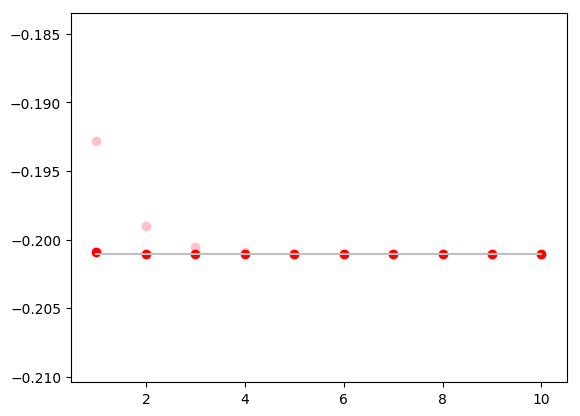

la derivada real es: real


In [39]:
comparacion(conjunto,cos)